# Graph-Isomorphism Problem

###### Author: Keelan duddy 

## Introduction

Before we can talk about the Graph-Isomorphism problem we must state what these terms in graph theory mean.

Graph: Graph is a mathematical representation of a network and it describes the relationship between lines and points. A graph consists of some points and lines between them. The length of the lines and position of the points do not matter. Each object in a graph is called a node. [[1]](https://economictimes.indiatimes.com/definition/graph-theory)

Vertex: Vetex also known as a node represents a point on graph. Vertices is the plural term of multiple vertex in a graph. [[2]](https://www.tutorialspoint.com/edges-and-vertices-of-graph)

Edges: Are the set of lines which interconnect the vertices. A degree of a vertex is the amount of edges connecting it. [[2]](https://www.tutorialspoint.com/edges-and-vertices-of-graph)

The Diagram below shows A graph with 6 vertices and 7 edges: [[3]](https://en.wikipedia.org/wiki/Vertex_(graph_theory))



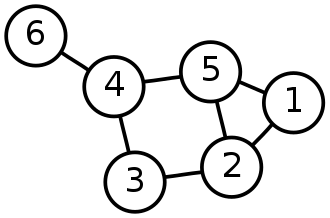

# What is Graph-Isomorphism Problem

Graphs can exist in different forms and look different to each other. Two graphs that have the same number of vertices, edges, and same edge connectivity are called isomorphic graphs. Even if they don't look like each other, the below diagram is an example of this: [[4]](https://www.tutorialspoint.com/graph_theory/graph_theory_isomorphism.htm)

Isomorphism is a mapping for which an inverse mapping also exists. It's a way to describe equivalence.
Graphs are used in fields like pattern recognition, computer vision and matching. Efficient graph isomorphism algorithms could lead to big break throughs in these fields and produces great innovations. [[5]](https://en.wikipedia.org/wiki/Graph_isomorphism_problem)


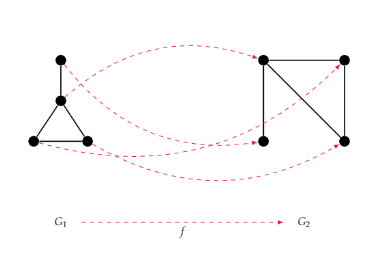

So when it comes to what Graph-Isomorphism Problem means, it means the computational problem of determining whether two finite graphs are isomorphic. That what the problem is. It may seem that this problem isn't that difficult. However it is and i'll go into more detail on why, below. [[5]](https://en.wikipedia.org/wiki/Graph_isomorphism_problem)

## P vs NP

In computational complexity theory, a <b>complexity class </b> is a set of computational problems of related resource-based complexity. The two most commonly analyzed resources are time and memory. Two of these complexity classes are called P(polynomial time) and NP(nondeterministic polynomial time). The Graph Isomorphism is considered an NP problem.                 [[6]](https://en.wikipedia.org/wiki/Complexity_class)

The Graph Isomorphism problem is not known to be solvable in polynomial time nor to be NP-complete, and therefore may be in the computational complexity class NP-intermediate. [[5]](https://en.wikipedia.org/wiki/Graph_isomorphism_problem)

P versus NP is one of the biggest interests to people working with computers and in mathematics. 

One way of asking it is, "Can every solved problem whose answer can be checked quickly by a computer, also be quickly solved by a computer?". 

Math problems are referred to as P or NP, whether they are solvable in finite polynomial time. P problems are have their solution time bound to a polynomial and so are relatively fast for computers to solve, and so are considered "easy".

NP problems are fast (and so "easy") for a computer to check, but are not necessarily easy to solve. [[7]](https://simple.wikipedia.org/wiki/P_versus_NP)

The P vs NP is one of the millenium problems which are 7 big unanswered math problems if solved, the person who solves it will get 1 million dollars. [[8]](https://simple.wikipedia.org/wiki/Millennium_Prize_Problems)

The person would need to figure out weather P = NP. Which involves a solution to a problem that can be easy to solve and check. 

The below diagram demostartes what I mean:

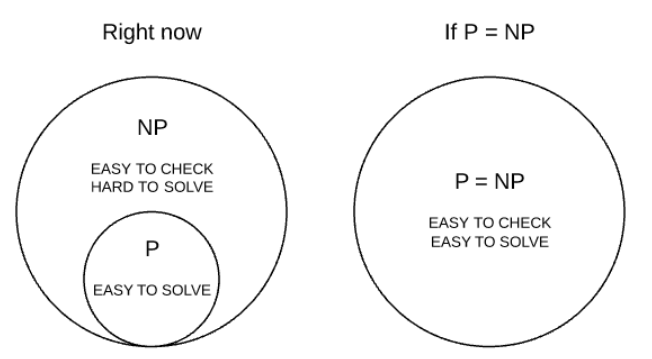

# Graph Isomorphism Implementation

The code below checks if two graphs are isomorphic or not using their matrices.

For two graphs to be Isomorphic, the following must be present:


The amount of edges in the 2 graphs must be same.

The amount of vertices in the 2 graphs must be same.

The length formed by the vertices with equal degree in one graph, are the same length in the other graph as well.

The Degree sequence of the 2 graphs must be same. [[5]](https://en.wikipedia.org/wiki/Graph_isomorphism_problem)

In [1]:
# imports
import networkx as nx
import numpy as np
import itertools 

# what the graph look like
params = {'node_color': 'lightblue', 'node_size' : 700, 'font_size': 18, 'with_labels': True}

#take the two adjacent matrices and check if their degree sequeces are equal.
def degreeSeq(matrix):
    
    #array for result
    s = []
    
    # Loop size of matrix.
    for v in range(len(matrix)):
        
        s.append(sum(matrix[v]))
        
    #reverse sort the array and return it.
    
    s.sort(reverse=True)
    
    return s



# Once Ensuring that the degree sequence is equal we see if the graph order of both graphs are equal or not
# checks length of the matrix
def order(matrix):
    
    # If not, returns -1 
    if len(matrix) != len(matrix[0]):
        
        return -1
    else:
        
        # return length
        return len(matrix)


# gets every permutations of the passed matrix.
def permutations(matrix):
    
    #  array of permutations
    m = []
    
    ar = list(range(len(matrix)))
    
    # every possible combinations.
    possCombo = [
        list(i) for i in itertools.permutations(ar, len(ar))
    ]
    
    
    # goes through all the combinations, exchange places and put in array.
    for ar_c in possCombo:
        
        k = matrix
        
        k = k[ar_c]
        
        #Reverse or permute the axes of an array; returns the modified array.
        k = np.transpose(np.transpose(k)[ar_c])
        
        # adds to array
        m.append({
            
            "perm_v":
            
            ar_c,
            
            "a_m":
            
            k
        })
        
    #return array
    return m



# main function
def checkIso(matrix1, matrix2):
    
    # gets degree sequnces
    seq1 = degreeSeq(matrix1)
    
    seq2 = degreeSeq(matrix2)
    
    
    # checks order function
    if order(matrix1) != order(matrix2):
        
        # Not isomorphic
        return False
    
   
    elif np.array_equal(seq1, seq2) == False:
        # Not isomorphic
        return False
    
    # if the two above checks pass
    else:
        for a_m in list(
            
                map(lambda matrix: matrix["a_m"],
                    
                    #permutations of the second matrix for comparison.
                    
                    permutations(matrix2))):
            
            if np.array_equal(matrix1, a_m) == True:
                
                # We have all match returns true
                return True
            
    # else returns false
    return False  


##### Summary

The algorithm above is not very efficient and is brute force code for isomorphism. This algorithm checks if graphs are isomorphic or not by taking 2 matrices and will return either a true or false. [[9]](https://tonicanada.medium.com/brute-force-code-for-isomorphisms-1241ef180570)

## Checking that 2 graphs are Isomorphic

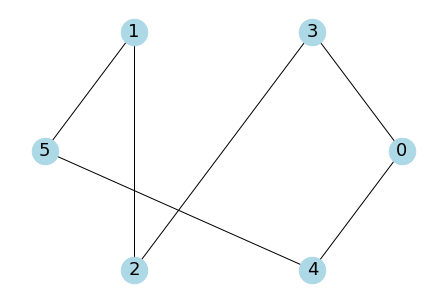

In [2]:
# two  graphs
g1 = nx.Graph()

g2 = nx.Graph()

# creates the edges
e1 = ((0, 3) , (1, 5) , (2, 1) , (3, 2), (4, 0), (5,4))

e2 = ((0, 4) , (1, 0) , (2, 5) , (3, 2), (4, 3), (5,1) )

# adds the edges.
g1.add_edges_from(e1)

g2.add_edges_from(e2)

# draws graph 1
nx.draw_circular(g1, **params)

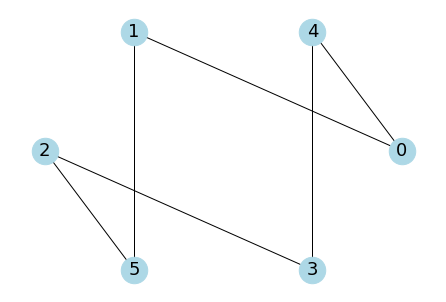

In [3]:
#draws graph 2
nx.draw_circular(g2, **params)

In [4]:
# This gets the matrices of the 2 graphs
M1 = nx.to_numpy_array(g1).astype(np.uint8)
M2 = nx.to_numpy_array(g2).astype(np.uint8)

# checks if they are Isomorphic
checkIso(M1, M2)

True

## Answer: True.  The 2 graphs are Isomorphic <br>
<br>
<br>
<br>
<br>

## Checking that 2 graphs are Not Isomorphic

In [5]:
# two  graphs
g3 = nx.Graph()

g4 = nx.Graph()

# creates the edges
e1 = ((0, 3) , (1, 5) , (2, 0) , (3, 2), (4, 0), (5,4))

e2 = ((0, 4) , (1, 0) , (2, 5) , (3, 1), (4, 3), (5,1) )

# adds the edges.
g3.add_edges_from(e1)

g4.add_edges_from(e2)

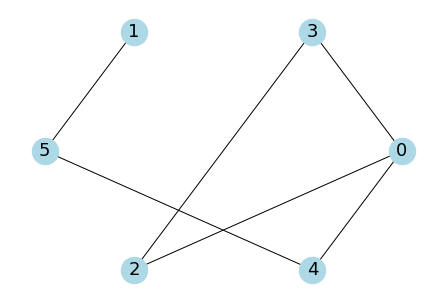

In [6]:
# draws graph 3
nx.draw_circular(g3, **params)

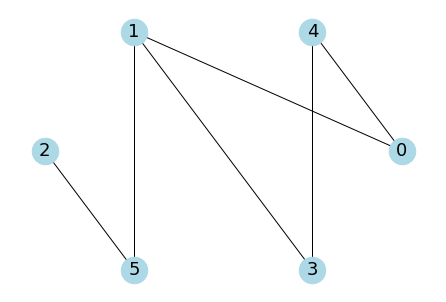

In [7]:
# draws graph 4
nx.draw_circular(g4, **params)

In [8]:
# This gets the matrices of the 2 graphs
M1 = nx.to_numpy_array(g3).astype(np.uint8)
M2 = nx.to_numpy_array(g4).astype(np.uint8)

# checks if they are Isomorphic
checkIso(M1, M2)

False

## Answer: False. The 2 graphs are not Isomorphic

<br>
<br>
<br>
<br>
<br>

# Explanation of how graphs can be represented in data structures. 

We can represent graphs in these 3 data structures

- Adjacency list
- Adjancency matrix


Below is an example of a graph that we will be demonstrating the following 2 data structures with:



Graph name: <b>GreenGraph</b>

## Adjacency List

Adjacency List is an array.  The size of the array is equal to the number of vertices. Let the array be an array[]. An entry array[i] represents the list of vertices adjacent to the ith vertex. 

This representation can also be used to represent a weighted graph. The weights of edges can be represented as lists of pairs. The Following is the adjacency list representation of the above <b>GreenGraph.</b> [[10]](https://www.geeksforgeeks.org/graph-and-its-representations/)
 

### Code Implementation

In [9]:
"""
A Python program to demonstrate the adjacency
list representation of the graph
"""

# A class to represent the adjacency list of the node


class AdjNode:
    def __init__(self, data):
        self.vertex = data
        self.next = None


# A class to represent a graph. A graph
# is the list of the adjacency lists.
# Size of the array will be the no. of the
# vertices "V"

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [None] * self.V

# Function to add an edge in an undirected graph
    def add_edge(self, src, dest):
        
# Adding the node to the source node
        node = AdjNode(dest)
        node.next = self.graph[src]
        self.graph[src] = node

# Adding the source node to the destination as
# it is the undirected graph

        node = AdjNode(src)
        node.next = self.graph[dest]
        self.graph[dest] = node

# Function to print the graph
    def print_graph(self):
        for i in range(self.V):
            print("Adjacency list of vertex {}\n head".format(i), end="")
            temp = self.graph[i]
            while temp:
                print(" -> {}".format(temp.vertex), end="")
                temp = temp.next
            print(" \n")


# Driver program to the above graph class
if __name__ == "__main__":
    V = 5
    graph = Graph(V)
    graph.add_edge(0, 1)
    graph.add_edge(0, 4)
    graph.add_edge(1, 2)
    graph.add_edge(1, 3)
    graph.add_edge(1, 4)
    graph.add_edge(2, 3)
    graph.add_edge(3, 4)

    graph.print_graph()

# credit Kanav Malhotra


Adjacency list of vertex 0
 head -> 4 -> 1 

Adjacency list of vertex 1
 head -> 4 -> 3 -> 2 -> 0 

Adjacency list of vertex 2
 head -> 3 -> 1 

Adjacency list of vertex 3
 head -> 4 -> 2 -> 1 

Adjacency list of vertex 4
 head -> 3 -> 1 -> 0 



## Adjacency Matrix

Adjacency Matrix represents connections between the vetices of a graph. Both the X and Y axis on a adjacency matrix represent the vertices of a graph. Where there is a 0 it represents that there is no direct connection(edge) between the two vertices. Where there is a 1, there is a direct connection. [[10]](https://www.geeksforgeeks.org/graph-and-its-representations/) 

Using matrices of graphs and comparing them is what I did in the code to try to find if 2 graph are Isomorphic above.
 
This is the adjacency matrix for the <b>GreenGraph</b> above: 

### Code Implementation

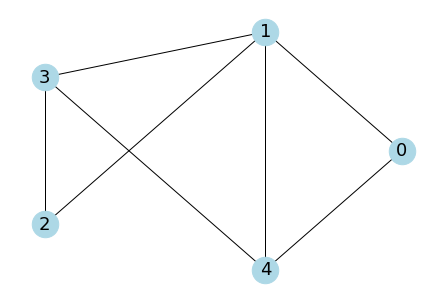

In [10]:
g = nx.Graph() # empty graph

e = ((0,1), (1,3), (2,1),(3,2),(3,1),(4,0),(4,1), (4,3)) #edges

g.add_edges_from(e)# add nodes

nx.draw_circular(g, **params) # draw graph

Graph name: BlueGraph

Import numpy package which has a function to display matrices [[11]](https://numpy.org/doc/)

In [11]:
# Import numpy library.
import numpy as np

# This matrix represents the relationships of the BlueGraph above.
print(nx.to_numpy_array(g).astype(np.uint8))

[[0 1 0 0 1]
 [1 0 1 1 1]
 [0 1 0 1 1]
 [0 1 1 0 0]
 [1 1 1 0 0]]


<br>
<br>
<br>
<br>
<br>

# Computational complexity of the Graph Isomorphism Problem

# References

Graph theory https://economictimes.indiatimes.com/definition/graph-theory [1]

vertices and edges https://www.tutorialspoint.com/edges-and-vertices-of-graph [2]

vertix graph theory https://en.wikipedia.org/wiki/Vertex_(graph_theory) [3]

tutorialspoint isomorphic https://www.tutorialspoint.com/graph_theory/graph_theory_isomorphism.htm [4]

Graph Isomorphism problem wiki https://en.wikipedia.org/wiki/Graph_isomorphism_problem [5]

complexity class  https://en.wikipedia.org/wiki/Complexity_class [6]

P vs NP https://simple.wikipedia.org/wiki/P_versus_NP [7]

Millennium Problems https://simple.wikipedia.org/wiki/Millennium_Prize_Problems [8]

brute force iso code https://tonicanada.medium.com/brute-force-code-for-isomorphisms-1241ef180570 [9]

GeeksforGeeks graph and its representations https://www.geeksforgeeks.org/graph-and-its-representations/ [10]

numpy doc https://numpy.org/doc/ [11]

sets geeksforgeeks https://www.geeksforgeeks.org/graph-representations-using-set-hash/ [12]